In [113]:
import scipy.io
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import pandas as pd


#1
y = scipy.io.loadmat('ex1.mat')['y']
x = scipy.io.loadmat('ex1.mat')['x']
y_val = scipy.io.loadmat('ex1.mat')['y_val']
x_val = scipy.io.loadmat('ex1.mat')['x_val']

In [100]:
x_val.shape

(20, 1)

In [104]:
x1 = sm.add_constant(x)
lmfit = sm.OLS(y,x1).fit()
print(lmfit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     18.28
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           0.000456
Time:                        16:13:24   Log-Likelihood:                -29.567
No. Observations:                  20   AIC:                             63.13
Df Residuals:                      18   BIC:                             65.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2067      0.275      0.750      0.4

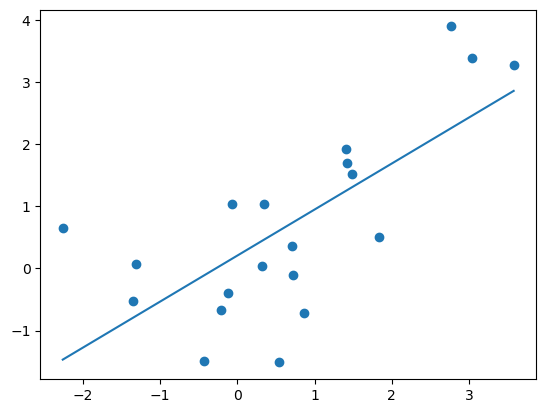

In [105]:
plt.scatter(x,y)
plt.plot(x,lmfit.predict(x1))

In [61]:
a = np.ndarray.flatten(x)
a.shape

b = np.ndarray.flatten(y)

In [73]:
poly2 = np.poly1d(np.polyfit(a, b, 2))
poly2line = np.linspace(-3,4)


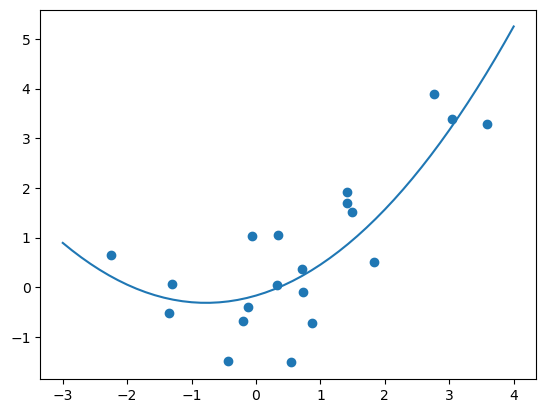

In [74]:
plt.scatter(a,b)
plt.plot(poly2line,poly2(poly2line))

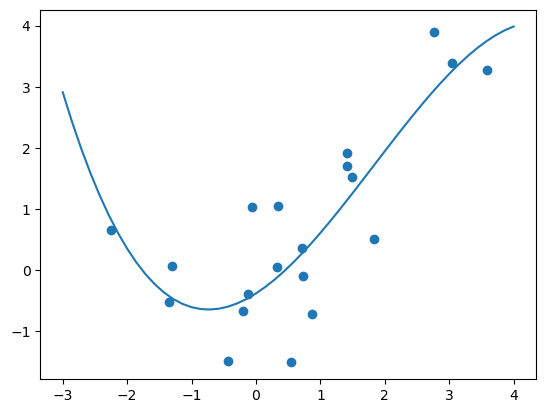

In [75]:
poly3 = np.poly1d(np.polyfit(a,b,3))
poly3line = np.linspace(-3,4)
plt.scatter(a,b)
plt.plot(poly3line,poly3(poly3line))

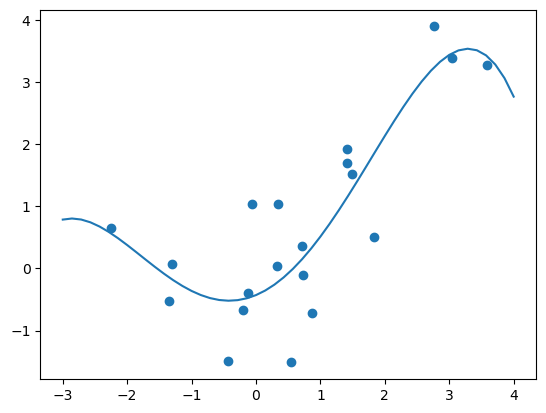

In [76]:
poly4 = np.poly1d(np.polyfit(a,b,4))
poly4line = np.linspace(-3,4)
plt.scatter(a,b)
plt.plot(poly4line,poly4(poly4line))

In [91]:
df = pd.DataFrame(data={'y':b,'x' :a})
lmfit2 = smf.ols('y ~ x + np.power(x,2) + np.power(x,3) + np.power(x,4)',df).fit()

In [92]:
print(lmfit2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     10.79
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           0.000253
Time:                        16:09:48   Log-Likelihood:                -23.025
No. Observations:                  20   AIC:                             56.05
Df Residuals:                      15   BIC:                             61.03
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.4288      0.294     -1.

In [115]:
c = np.ndarray.flatten(x_val)
d = np.ndarray.flatten(y_val)

y_pred = lmfit.predict(b)
y_pred2 = lmfit2.predict(b)

plt.scatter(x_val,y_val)

ValueError: shapes (1,20) and (2,) not aligned: 20 (dim 1) != 2 (dim 0)

In [137]:
#2
from plot3d import *
from sklearn.decomposition import PCA

X = scipy.io.loadmat('ex2.mat')['X']

myscatter3(X)

SyntaxError: invalid syntax (287356333.py, line 8)

In [134]:
pcafit = PCA().fit(X)

pca_vars = pcafit.explained_variance_
print(pca_vars)

V = pcafit.components_.T 
# the colummns of V tell us which variables contribute to each principle component
print(V)

W = pcafit.transform(X)
# the rows of W tell us the representation of each datapoint in our new coordinate system
print(W)

W_var = np.var(W,axis=1)
print(W_var)

[3.8147667  0.98235957 0.04041611]
[[ 0.89982776  0.20958423 -0.38260222]
 [-0.18073568  0.97732713  0.11030091]
 [-0.39704486  0.03010195 -0.91730543]]
[[ 1.59417052e+00 -1.69815135e-01  7.69534380e-02]
 [-2.71163436e+00 -1.00042251e+00  2.01603471e-02]
 [ 7.68632549e-02  1.56768469e+00 -2.53044511e-02]
 [-2.50574069e-01 -2.53609043e-01  3.20444448e-01]
 [-5.75849887e-01  1.08529480e-01 -6.37870428e-02]
 [ 1.37572199e+00 -2.69350559e-01 -3.26811455e-01]
 [-2.04522079e+00  8.60822001e-01  3.13966103e-01]
 [-4.56323410e+00  1.91326213e+00 -7.93648228e-02]
 [ 5.10871820e+00  1.04863476e+00 -2.97262863e-01]
 [-2.95602363e-01 -1.83774668e+00 -9.76750057e-02]
 [-1.76744758e+00  1.84018454e-01 -1.26110879e-01]
 [ 1.72485471e+00  9.65011792e-01  7.78276043e-02]
 [-7.41025317e-02 -1.43368302e+00  1.63126212e-02]
 [-2.28848735e-01 -8.83778109e-01  2.10992090e-01]
 [ 1.33144718e+00  8.80860300e-01  8.13663638e-03]
 [-1.30291867e+00 -1.02697620e+00  9.56981266e-02]
 [-2.31974322e+00 -1.05086349e+

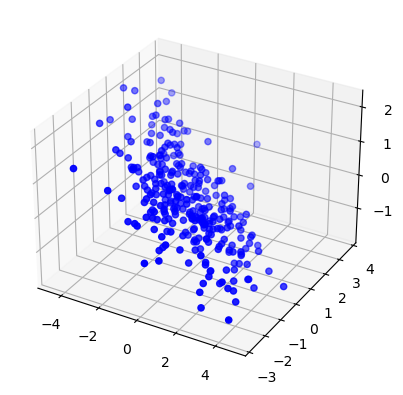

In [145]:
myscatter3(X)

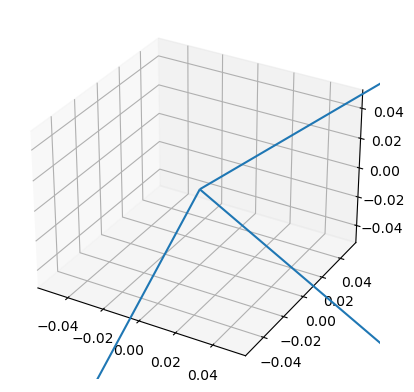

In [146]:
vecarrow3d(V[:,0]) # first PC vector
vecarrow3d(V[:,1]) # second PC vector
vecarrow3d(V[:,2]) # third PC vector

In [149]:
X2 = np.matmul(W[:,0:2],np.transpose(V[:,0:2]))
# X2 = W2V2T
# reduced to 2 dimensions